<a href="https://colab.research.google.com/github/csaben/RadApp/blob/main/alternate_training_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# need to factory reset runtime to get over 409 error
# save your kaggle.json to a folder called Kaggle in your My Drive directory

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Kaggle


/content/gdrive/My Drive/Kaggle


In [ ]:
!pwd

/content/gdrive/My Drive/Kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
# !From Clark: I had some issues getting my kaggle.json to work and refactored a few things to get it to go. Uncomment from here to use your setup
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import time 
import re 
import cv2
import matplotlib as plt
!pip install pydicom
import pydicom
import glob as glob
import os

import json
import glob
import random
import collections

import numpy as np
import pandas as pd
import pydicom
from pydicom import dcmread
from pydicom.pixel_data_handlers.util import apply_voi_lut
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation, rc
rc('animation', html='jshtml')

#these four imports is because the figure visualization tool was giving me errors 
from matplotlib import figure
from matplotlib import *
import sys
from pylab import *

from matplotlib import animation, rc

     |████████████████████████████████| 2.0 MB 9.1 MB/s 


In [ ]:
! kaggle datasets download -d clarksaben/radapp-initial-database-and-control-set
! unzip radapp-initial-database-and-control-set.zip

radapp-initial-database-and-control-set.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  radapp-initial-database-and-control-set.zip
replace Tumor/P10/S1/11.000000-T1post-42737/1-01.dcm? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


In [ ]:
!ls

brain-mri-images-for-brain-tumor-detection.zip
brain-tumor-classification-mri.zip
brain_tumor_dataset
kaggle.json
no
radapp-initial-database-and-control-set.zip
Testing
Training
Tumor
yes


In [ ]:
# gets all the subfolders in a given path
def get_all_subfolder_names(path):
    subdirs = []
    for root, dirs, files in os.walk(path):
        for dir in dirs:
            subdirs.append(os.path.join(root, dir))
    return subdirs

In [ ]:
#gets all the subfolder names at a given depth (i.e. the number of '/' in the folder path name)  
#last change is your folder location 
shankar= '/content/Tumor'
clark = './Tumor'
def get_subfolder_at_depth(depth):
  folder_names = []
  for subfolder in sort(get_all_subfolder_names(clark)):
    if(subfolder.count('/')==depth):
      folder_names.append(subfolder)      
  return(folder_names)

In [ ]:
dicom_screenings = []
dicom_screenings_to_merge = []

# print(get_subfolder_at_depth(3))
dicom_screenings = get_subfolder_at_depth(3)

#print(get_subfolder_at_depth(4))
dicom_screenings = get_subfolder_at_depth(4)

#print(get_subfolder_at_depth(5))
dicom_screenings_to_merge = get_subfolder_at_depth(5)

In [ ]:
dicom_screenings = []
dicom_screenings_to_merge = []

# print(get_subfolder_at_depth(3))
# dicom_screenings = get_subfolder_at_depth(4)

#print(get_subfolder_at_depth(4))
dicom_screenings = get_subfolder_at_depth(3)

#print(get_subfolder_at_depth(5))
dicom_screenings_to_merge = get_subfolder_at_depth(4)

In [ ]:
print(dicom_screenings)
print(dicom_screenings_to_merge)

['./Tumor/P10/S1', './Tumor/P10/S2', './Tumor/P11/S1', './Tumor/P11/S2', './Tumor/P2/S1', './Tumor/P2/S2', './Tumor/P3/S1', './Tumor/P3/S2', './Tumor/P4/S1', './Tumor/P5/S1', './Tumor/P6/S1', './Tumor/P6/S2', './Tumor/P8/S1', './Tumor/P9/S1']
['./Tumor/P10/S1/11.000000-T1post-42737', './Tumor/P10/S1/36862.000000-FLAIR_reg-67251', './Tumor/P10/S2/12.000000-T1post-12905', './Tumor/P11/S1/11.000000-T1post-88240', './Tumor/P11/S2/11.000000-T1post-92351', './Tumor/P2/S1/12.000000-T1post-05670', './Tumor/P2/S1/36459.000000-FLAIR_reg-76244', './Tumor/P2/S2/11.000000-T1post-73420', './Tumor/P2/S2/36449.000000-FLAIR_reg-98695', './Tumor/P2/S2/37921.000000-T2_reg-58639', './Tumor/P3/S1/12.000000-T1post-10326', './Tumor/P3/S2/11.000000-T1post-13575', './Tumor/P4/S1/13.000000-T1post-77241', './Tumor/P4/S1/36529.000000-FLAIR_reg-88719', './Tumor/P4/S1/37758.000000-T2_reg-76823', './Tumor/P5/S1/10006.000000-T1pre_reg-53775', './Tumor/P6/S1/11.000000-T1post-45042', './Tumor/P6/S1/36870.000000-FLAIR_r

In [ ]:
# make a key-value where the Patient's screen is key, and the rest is the value

res_dicoms = {}
for dicom_screening in dicom_screenings:
  res = []
  for dicom_screening_to_merge in dicom_screenings_to_merge:
    if dicom_screening_to_merge.count(dicom_screening) > 0:
      res.append(dicom_screening_to_merge)
  res_dicoms[dicom_screening] = (res)
print(res_dicoms)

{'./Tumor/P10/S1': ['./Tumor/P10/S1/11.000000-T1post-42737', './Tumor/P10/S1/36862.000000-FLAIR_reg-67251'], './Tumor/P10/S2': ['./Tumor/P10/S2/12.000000-T1post-12905'], './Tumor/P11/S1': ['./Tumor/P11/S1/11.000000-T1post-88240'], './Tumor/P11/S2': ['./Tumor/P11/S2/11.000000-T1post-92351'], './Tumor/P2/S1': ['./Tumor/P2/S1/12.000000-T1post-05670', './Tumor/P2/S1/36459.000000-FLAIR_reg-76244'], './Tumor/P2/S2': ['./Tumor/P2/S2/11.000000-T1post-73420', './Tumor/P2/S2/36449.000000-FLAIR_reg-98695', './Tumor/P2/S2/37921.000000-T2_reg-58639'], './Tumor/P3/S1': ['./Tumor/P3/S1/12.000000-T1post-10326'], './Tumor/P3/S2': ['./Tumor/P3/S2/11.000000-T1post-13575'], './Tumor/P4/S1': ['./Tumor/P4/S1/13.000000-T1post-77241', './Tumor/P4/S1/36529.000000-FLAIR_reg-88719', './Tumor/P4/S1/37758.000000-T2_reg-76823'], './Tumor/P5/S1': ['./Tumor/P5/S1/10006.000000-T1pre_reg-53775'], './Tumor/P6/S1': ['./Tumor/P6/S1/11.000000-T1post-45042', './Tumor/P6/S1/36870.000000-FLAIR_reg-18189'], './Tumor/P6/S2': ['

In [ ]:
for res_dicom in res_dicoms:
  print(res_dicom + "-" + str(res_dicoms[res_dicom]))

./Tumor/P10/S1-['./Tumor/P10/S1/11.000000-T1post-42737', './Tumor/P10/S1/36862.000000-FLAIR_reg-67251']
./Tumor/P10/S2-['./Tumor/P10/S2/12.000000-T1post-12905']
./Tumor/P11/S1-['./Tumor/P11/S1/11.000000-T1post-88240']
./Tumor/P11/S2-['./Tumor/P11/S2/11.000000-T1post-92351']
./Tumor/P2/S1-['./Tumor/P2/S1/12.000000-T1post-05670', './Tumor/P2/S1/36459.000000-FLAIR_reg-76244']
./Tumor/P2/S2-['./Tumor/P2/S2/11.000000-T1post-73420', './Tumor/P2/S2/36449.000000-FLAIR_reg-98695', './Tumor/P2/S2/37921.000000-T2_reg-58639']
./Tumor/P3/S1-['./Tumor/P3/S1/12.000000-T1post-10326']
./Tumor/P3/S2-['./Tumor/P3/S2/11.000000-T1post-13575']
./Tumor/P4/S1-['./Tumor/P4/S1/13.000000-T1post-77241', './Tumor/P4/S1/36529.000000-FLAIR_reg-88719', './Tumor/P4/S1/37758.000000-T2_reg-76823']
./Tumor/P5/S1-['./Tumor/P5/S1/10006.000000-T1pre_reg-53775']
./Tumor/P6/S1-['./Tumor/P6/S1/11.000000-T1post-45042', './Tumor/P6/S1/36870.000000-FLAIR_reg-18189']
./Tumor/P6/S2-['./Tumor/P6/S2/11.000000-T1post-96623', './Tumor/

In [ ]:
#jpg dataset(initial one, plan is to generate a model for these and scale our average images of the patient series to this to test accuracy)
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
! unzip brain-mri-images-for-brain-tumor-detection.zip

In [ ]:
'''
todo list:
-upload the jpg data set[done]
-find the dimensions of the images
-use res_dicom to grabs dcms and generate an average image using pydicom
-scale the image to the jpg dataset
->bit of a cross roads, we can use these as an example for handling of patient data 
on yonathans side if we train a jpg based model that predicts well on these

example implementations to given dataset:
https://www.kaggle.com/ruslankl/brain-tumor-detection-v1-0-cnn-vgg-16/notebook
https://www.kaggle.com/ethernext/brain-tumour-detection-with-cnn-96-accuracy


later(439 error temporarily)
-remove sagittal and coronal from extra jpg dataset on pc and upload (light-weight version)->either new net for ensemble or train together



'''

'\ntodo list:\n-upload the jpg data set[done]\n-find the dimensions of the images\n-use res_dicom to grabs dcms and generate an average image using pydicom\n-scale the image to the jpg dataset\n->bit of a cross roads, we can use these as an example for handling of patient data \non yonathans side if we train a jpg based model that predicts well on these\n\nexample implementations to given dataset:\nhttps://www.kaggle.com/ruslankl/brain-tumor-detection-v1-0-cnn-vgg-16/notebook\nhttps://www.kaggle.com/ethernext/brain-tumour-detection-with-cnn-96-accuracy\n\n\nlater(439 error temporarily)\n-remove sagittal and coronal from extra jpg dataset on pc and upload (light-weight version)->either new net for ensemble or train together\n\n\n\n'

In [ ]:
%pwd

'/content/gdrive/My Drive/Kaggle'

In [ ]:
ls

brain-mri-images-for-brain-tumor-detection.zip
brain-tumor-classification-mri.zip
brain_tumor_dataset/
kaggle.json
no/
radapp-initial-database-and-control-set.zip
Testing/
Training/
Tumor/
yes/


In [ ]:
# gets all the subfolders in a given path
def get_all_subfolder_names(path):
    subdirs = []
    for root, dirs, files in os.walk(path):
        for dir in dirs:
            subdirs.append(os.path.join(root, dir))
    return subdirs

In [ ]:
#viewing the train and test jpgs
train_tumor = 'Testing/glioma_tumor'
train_control = 'Testing/no_tumor'

test_tumor = 'Testing/glioma_tumor'
test_control = 'Testing/no_tumor'

tumor = os.listdir(train_tumor)
control = os.listdir(train_control)

In [ ]:
os.listdir('no')

simple binary clf
link: https://www.kaggle.com/ethernext/brain-tumour-detection-with-cnn-96-accuracy

In [ ]:
#start here
!pip install imutils
import numpy as np 
import pandas as pd 
import os
from os import listdir
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import imutils    

from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
!mkdir augmented-images


In [ ]:
!mkdir augmented-images/yes
!mkdir augmented-images/no

In [ ]:
os.listdir(augmented_data_path)

['yes', 'no']

In [ ]:
!mkdir dataset

In [ ]:
!ls

augmented-images
brain-mri-images-for-brain-tumor-detection.zip
brain-tumor-classification-mri.zip
brain_tumor_dataset
dataset
kaggle.json
no
radapp-initial-database-and-control-set.zip
Testing
Training
Tumor
yes


In [ ]:
!mv no dataset

In [ ]:
!mv yes dataset

In [ ]:
os.listdir('dataset/no')

In [ ]:
image_dir = 'dataset/'

In [ ]:
def augment_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  shear_range=0.1, 
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True, 
                                  vertical_flip=True, 
                                  fill_mode='nearest'
                                 )

    for filename in listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        # reshape the image
        image = image.reshape((1,)+image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir,save_prefix=save_prefix, save_format='jpg'):
                i += 1
                if i > n_generated_samples:
                    break

In [ ]:
#replicating augmentations script

augmented_data_path ='augmented-images/'
# augment data for the examples with label equal to 'yes' representing tumurous examples
augment_data(file_dir=image_dir+'yes',n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
# augment data for the examples with label equal to 'no' representing non-tumurous examples
augment_data(file_dir=image_dir+'no', n_generated_samples=9, save_to_dir=augmented_data_path+'no')

In [ ]:
#cropping and subsequently visualizing

def crop_brain_contour(image, plot=False):
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    # extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

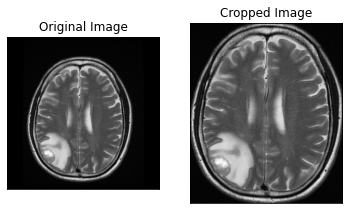

In [ ]:
#apply cropping to visualize
ex_img = cv2.imread(image_dir+'yes/Y107.jpg')
ex_crop_img = crop_brain_contour(ex_img, True)

In [ ]:
#load data
def load_data(dir_list, image_size):

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in listdir(directory):
            image = cv2.imread(directory+'/'+filename)
            image = crop_brain_contour(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
            image = image / 255.
            # convert image to numpy array and append it to X
            X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
            if directory[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])
                
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    
    return X, y

In [ ]:
#set dimensions of data
augmented_yes =augmented_data_path+'yes'
augmented_no = augmented_data_path+'no'

IMG_WIDTH, IMG_HEIGHT = (240, 240)

X, y = load_data([augmented_yes, augmented_no], (IMG_WIDTH, IMG_HEIGHT))


Number of examples is: 2063
X shape is: (2063, 240, 240, 3)
y shape is: (2063, 1)


In [ ]:
#visualize script
def plot_sample_images(X, y, n=40):
    for label in [0,1]:
        # grab the first n images with the corresponding y values equal to label
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(10, 8))
        
        i = 1 # current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                           labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

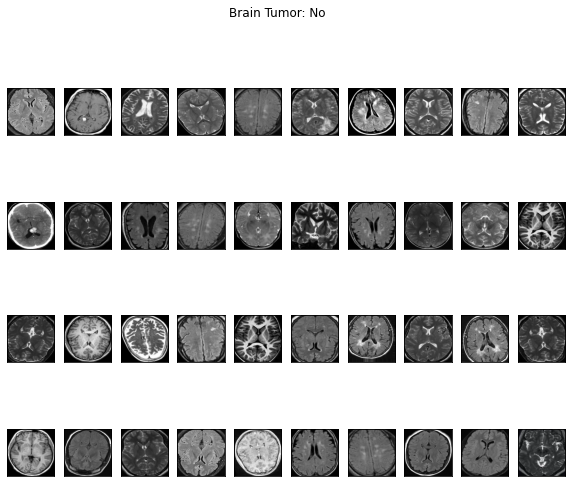

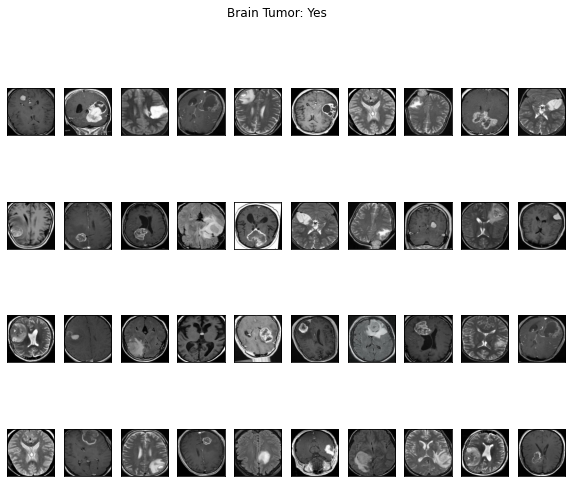

In [ ]:
plot_sample_images(X, y)

In [ ]:
#split data
def split_data(X, y, test_size=0.2):
       
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))

number of training examples = 1444
number of validation examples = 310
number of test examples = 309


In [ ]:
# model setup
def build_model(input_shape):
    X_input = Input(input_shape) 
    X = ZeroPadding2D((2, 2))(X_input) 
    
    X = Conv2D(32, (7, 7), strides = (1, 1))(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X) 
    
    X = MaxPooling2D((4, 4))(X) 
    X = MaxPooling2D((4, 4))(X) 
    X = Flatten()(X) 
    X = Dense(1, activation='sigmoid')(X) 
    model = Model(inputs = X_input, outputs = X)
    
    return model

In [ ]:
#model build
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
model=build_model(IMG_SHAPE)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 244, 244, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 238, 238, 32)      4736      
                                                                 
 bn0 (BatchNormalization)    (None, 238, 238, 32)      128       
                                                                 
 activation (Activation)     (None, 238, 238, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                           

In [ ]:
#train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=y_train, batch_size=32, epochs=12, validation_data=(X_val, y_val))
model.save("model_1.h5")

Epoch 1/12
46/46 [==============================] - 128s 3s/step - loss: 0.4927 - accuracy: 0.7625 - val_loss: 0.5561 - val_accuracy: 0.7516
Epoch 2/12
46/46 [==============================] - 127s 3s/step - loss: 0.3793 - accuracy: 0.8310 - val_loss: 0.5218 - val_accuracy: 0.8097
Epoch 3/12
46/46 [==============================] - 127s 3s/step - loss: 0.3314 - accuracy: 0.8587 - val_loss: 0.4650 - val_accuracy: 0.8226
Epoch 4/12
46/46 [==============================] - 126s 3s/step - loss: 0.3281 - accuracy: 0.8560 - val_loss: 0.6113 - val_accuracy: 0.7000
Epoch 5/12
46/46 [==============================] - 132s 3s/step - loss: 0.4259 - accuracy: 0.8179 - val_loss: 0.4094 - val_accuracy: 0.8194
Epoch 6/12
46/46 [==============================] - 128s 3s/step - loss: 0.2882 - accuracy: 0.8837 - val_loss: 0.4117 - val_accuracy: 0.8419
Epoch 7/12
46/46 [==============================] - 128s 3s/step - loss: 0.3006 - accuracy: 0.8733 - val_loss: 0.3579 - val_accuracy: 0.8290
Epoch 8/12
46

In [ ]:
history = model.history.history

In [ ]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
plot_metrics(history)

NameError: ignored

In [ ]:
#image dimensions to replicate in the dicom preprocessing is 240,240,3
#save the h5 locally for the inference script testing

#next
'''
take the original file managing script and organize in the best way to thereby vonvert into a jpg and hand using the same augmentations and params that were used in the original traihning script preprocessing
'''

'\ntake the original file managing script and organize in the best way to thereby vonvert into a jpg and hand using the same augmentations and params that were used in the original traihning script preprocessing\n'